## Inference : Special Moves of SFII 

---
### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

---
### Load data(deserialize)

In [3]:
# Load data (deserialize)
with open('movesSF2.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)


# Spliting into training, dev and test set using indexing
dataset_x = unserialized_data['dataset_x']
dataset_y = unserialized_data['dataset_y']
name_classes = {y: x for x, y in unserialized_data['name_classes'].items()}
num_classes = np.unique(dataset_y).shape[0]

---
### Categorical

In [4]:
# convert class vectors to binary class matrices
dataset_y = keras.utils.to_categorical(dataset_y, num_classes)
print(dataset_y.shape)

(2476, 10, 4)


---
### Model load and Evaluate

In [5]:
model = tf.keras.models.load_model('movesSF2_pre_trained.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 10, 54, 54, 64)    154624    
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 54, 54, 64)    256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 27, 27, 64)    0         
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 25, 25, 128)   885248    
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 25, 25, 128)   512       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 10, 12, 12, 128)   0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 10, 10, 64)    4

In [6]:
test_loss, test_acc = model.evaluate(dataset_x,  dataset_y, batch_size=8, verbose=1)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

310/310 [==============================] - 116s 375ms/step - loss: 0.0042 - acc: 0.9989
Test loss: 0.004237690940499306
Test accuracy: 0.9989095330238342


---
### Predict

In [7]:
def showResult(result, choice):
    # Displaying random choice of dataset
    reverse_result = np.argmax(result.squeeze(), axis=1)
    plt.figure(figsize = (10,2))
    for i in range(dataset_x.shape[1]):
        img = dataset_x[choice][i]
        plt.subplot(1,dataset_x.shape[1],i+1)
        plt.gca().set_title(name_classes[reverse_result[i]])
        plt.imshow(img, aspect='auto')
    plt.tight_layout()
    plt.show()

CPU times: total: 1.11 s
Wall time: 1.08 s


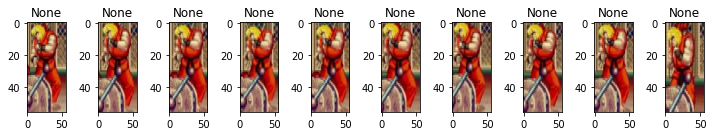

In [8]:
choice = np.random.choice(dataset_x.shape[0])
%time result = model.predict(np.expand_dims(dataset_x[choice], axis=0))
showResult(result, choice)

In [9]:
np.set_printoptions(suppress=True)
print("dataset_y :\t", np.argmax(dataset_y[choice], axis=1))
print("predict :\t", np.argmax(result.squeeze(), axis=1))
print(result)

dataset_y :	 [0 0 0 0 0 0 0 0 0 0]
predict :	 [0 0 0 0 0 0 0 0 0 0]
[[[0.99983    0.00000584 0.00013442 0.00002967]
  [0.99990976 0.00000045 0.00000602 0.00008371]
  [0.9999924  0.00000005 0.00000045 0.00000718]
  [0.99998045 0.00000038 0.00000113 0.00001803]
  [0.99997985 0.00000031 0.0000007  0.00001906]
  [0.9999746  0.00000025 0.00000041 0.00002474]
  [0.99995065 0.00000305 0.00001136 0.00003487]
  [0.9998579  0.00000358 0.00000595 0.00013258]
  [0.99997056 0.00000026 0.00000092 0.00002833]
  [0.9999573  0.00000921 0.00000291 0.00003062]]]
